
# Project: Investigate the TMDb movie data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I chose the TMDb movie data set for this project and I will analyze them depending on these 3 questions:
<ol>
    <li>Which is the year with the most movies released?</li>
    <li>What is the year with the most history movies?</li>
    <li>What is the vote average for most action movies?</li>
    </ol>

In [3]:

import pandas as pd
import numpy as np 
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
# reading CSV file of the data set and showing the first five rows
tmdb = pd.read_csv('tmdb-movies.csv');
tmdb.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# getting the number of rows and columns
tmdb.shape

(10866, 21)

In [6]:
# getting the titles of the columns to know wich to drop later on
tmdb.columns


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
# checking the data types of every columns to check if any data type need to be changed
tmdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

I'm going to change release_date from object to date time

In [8]:
# changing the data type of release date to date time, pretty much self-explanatory
tmdb['release_date']= pd.to_datetime(tmdb['release_date']);

checking the change has happened

In [9]:
# checking the data types again to see if the change has happened
tmdb.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object


### Data Cleaning and Orgnaizing

I'm going to delete unwanted columns, any rows with null values, and duplicate rows for more accurate analysis.

In [11]:
# I dont need the following columns : imdb id, budget, revenue, keywords, cast, homepage, tagline, overview, runtime,
# production companies, budget adj and revenue adj. And I am going to drop them.
tmdb.drop(['imdb_id', 'budget', 'revenue', 'cast','homepage' ,'tagline' , 'keywords', 'overview', 'runtime','production_companies',
           'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [12]:
#checking if the change has been done
tmdb.head(1)

,id,popularity,original_title,director,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015


good, now I will see if theres any duplicates and drop it.

In [13]:
# checking how many rows are being duplicated
tmdb.duplicated().sum()

1

In [14]:
#there seems to be 1 row dupicated, so I have to drop it.
tmdb.drop_duplicates(inplace=True)

In [15]:
# checking if the drop was successful
tmdb.duplicated().sum()

0

nice, now I'm going to check for null values in columns and drop it.

In [16]:
# Checking for null values
tmdb.isnull().sum()

id                 0
popularity         0
original_title     0
director          44
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [17]:
# dropping the rows with the null values.
tmdb.dropna(inplace=True)

In [18]:
# checking if the drop was successful
tmdb.isnull().sum()

id                0
popularity        0
original_title    0
director          0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

Now I'm going to check the data set info after cleaning it.

In [19]:
# checking for the data set information
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 9 columns):
id                10800 non-null int64
popularity        10800 non-null float64
original_title    10800 non-null object
director          10800 non-null object
genres            10800 non-null object
release_date      10800 non-null datetime64[ns]
vote_count        10800 non-null int64
vote_average      10800 non-null float64
release_year      10800 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 843.8+ KB


I'm going to split every genre in their column so it can be easy to get the sum and count for plotting later on.

In [20]:
# splitting every genre in their column
tmdb = pd.concat([tmdb,tmdb.pop('genres').str.split('|',expand=True).stack().str.get_dummies().sum(level=0)],1)


## This helped me in splitting the genres : 
## https://stackoverflow.com/questions/57065878/split-pandas-column-and-create-new-columns-that-count-the-split-values

In [21]:
# checking if the change has occurred
tmdb.head(1)

,id,popularity,original_title,director,release_date,vote_count,vote_average,release_year,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,135397,32.985763,Jurassic World,Colin Trevorrow,2015-06-09,5562,6.5,2015,1,1,...,0,0,0,0,0,1,0,1,0,0


<a id='eda'></a>
## Exploratory Data Analysis

After cleaning and deleting unnecessary data now I can use the dataset to answer this research questions.

### Which is the year with the most movies released?

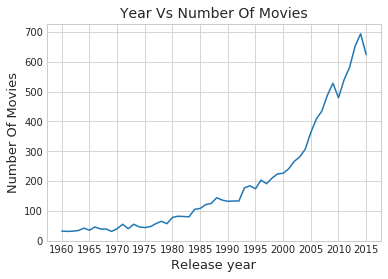

In [61]:
# plotting number of movies released by every 5 years
tmdb.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))
# styling the plot
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13);
sns.set_style("whitegrid")

Here we can see that number of movies per 5 years are acsending and the heighest was between 2010 and 2015.

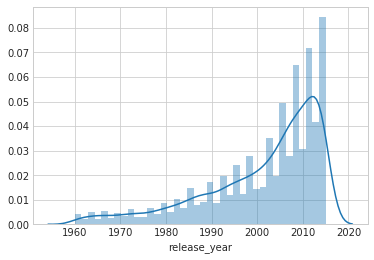

In [63]:
# plotting release year data
sns.distplot( tmdb["release_year"] );

Here I checked the frequency of release years to see if it matches the plot before.

### What is the year with the most history movies?

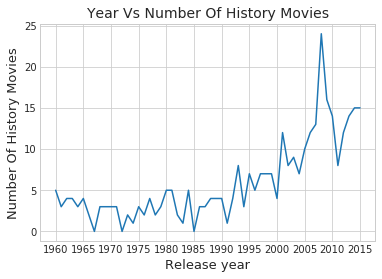

In [51]:
# plotting number of history movies by each release year with 5 years tick
tmdb.groupby('release_year').sum()['History'].plot(xticks = np.arange(1960,2016,5))
# styling the plot
plt.title("Year Vs Number Of History Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of History Movies',fontsize = 13);
sns.set_style("whitegrid")

As we can see most of the history movies was released between 2015 and 2010

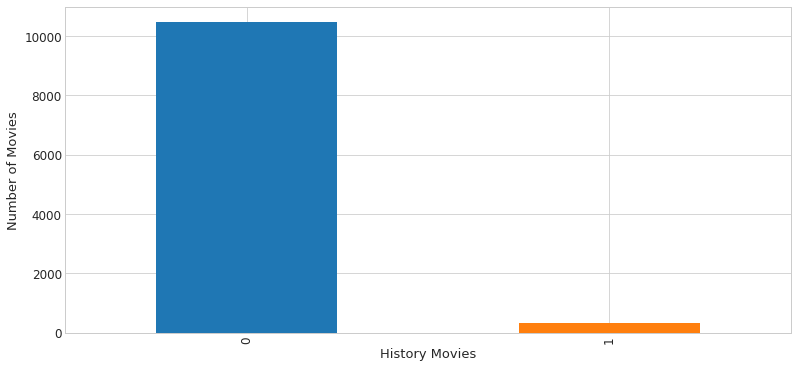

In [66]:
# plotting number of History movies that was created against total number of movies
tmdb['History'].value_counts().plot(kind='bar',figsize=(13,6),fontsize=12);
# styling the plot 
plt.xlabel('History Movies',fontsize = 13)
plt.ylabel('Number of Movies',fontsize = 13);
sns.set_style("whitegrid")

Here we can see that less than 1000 movies were history movies from total non-history movies which are more than 10 thousand, also we can see that the number range of history movies in the previous plot is reasonable since the total number of history movies is low.

(note: 1 means that the movie is a history movie, and 0 means that the movie is a non-history movie)

### What is the vote average for most action movies?

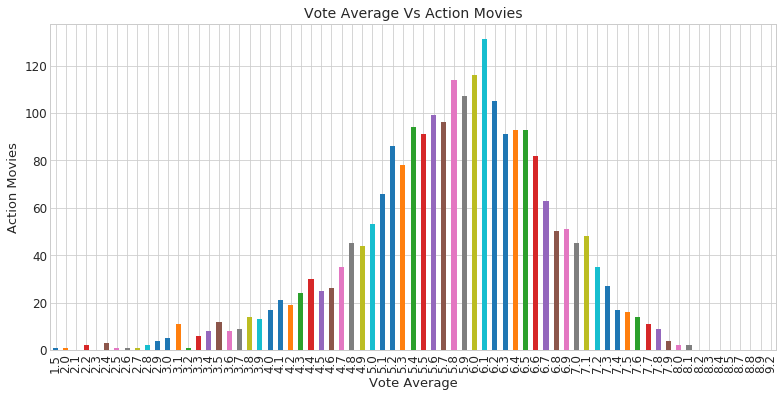

In [125]:
# plotting the frequency of vote average for action movies
tmdb.groupby('vote_average').sum()['Action'].plot(kind='bar',figsize=(13,6),fontsize=12)
# styling the plot
plt.title("Vote Average Vs Action Movies",fontsize = 14)
plt.xlabel('Vote Average',fontsize = 13)
plt.ylabel('Action Movies',fontsize = 13);
sns.set_style("whitegrid")

Here we can see that most of the action movies got a vote rating of 6.1 and the second most is 6.0.

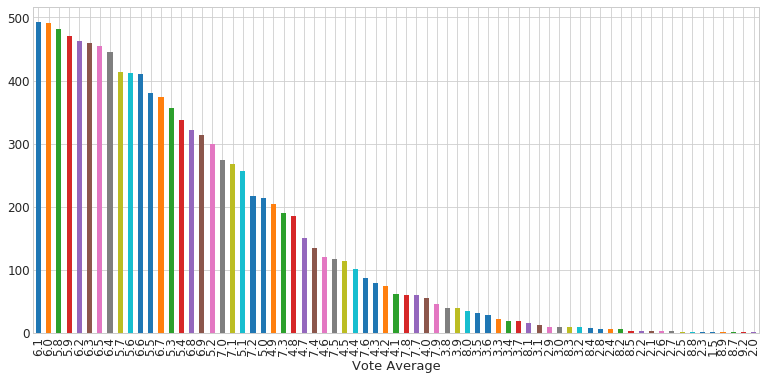

In [67]:
# plotting the vote average of total movies
tmdb['vote_average'].value_counts().plot(kind='bar',figsize=(13,6),fontsize=12);
# styling the plot
plt.xlabel('Vote Average',fontsize = 13)
sns.set_style("whitegrid")

Where here we can see that most of the movies got a vote average of 6.1 which means that action movies are in the same range
as other non-action movies.

<a id='conclusions'></a>
## Conclusions

Finally, I can find the answers for the questions of this project, as we can see that most of the movies have been released between 2010 and 2015, and in the second plot, we can see that most of the action movies where released between 2005 and 2010, and for the bar chart we can see that most of the action movies are getting a vote average of 6.1.

## Limitations

Genres not being split in first limited my questions choices and I would have thought of different questions that will be hard to answer by me in this early stage.